In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [24]:
import numpy as np
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score
from sklearn.model_selection import train_test_split

In [2]:
#read the data from the excel file
data = pd.read_excel('./data/churn_dataset/E Commerce Dataset.xlsx', sheet_name='E Comm')
data.head()

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,50001,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,159.93
1,50002,1,NaN,Phone,1,8.0,UPI,Male,3.0,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,120.90
2,50003,1,NaN,Phone,1,30.0,Debit Card,Male,2.0,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120.28
3,50004,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134.07
4,50005,1,0.0,Phone,1,12.0,CC,Male,NaN,3,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,129.60


In [3]:
data.shape

(5630, 20)

In [4]:
data['Churn'].value_counts()

Churn
0    4682
1     948
Name: count, dtype: int64

<Axes: xlabel='Churn', ylabel='count'>

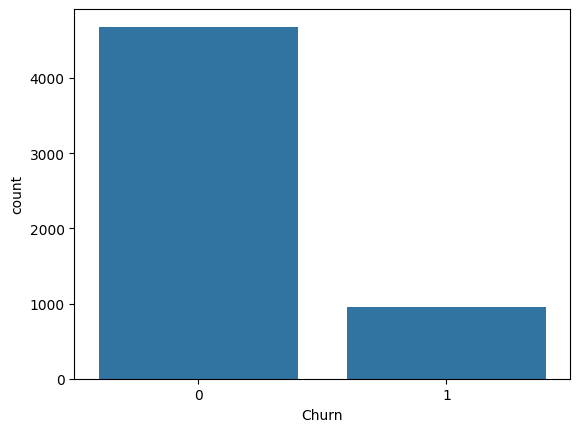

In [5]:
sns.countplot(x='Churn', data=data)

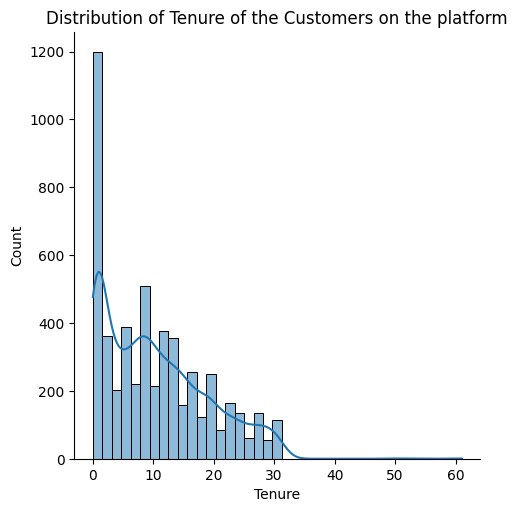

In [6]:
sns.displot(x='Tenure', kde=True, data=data)
plt.title("Distribution of Tenure of the Customers on the platform")
plt.show()

In [7]:
data.dtypes

CustomerID                       int64
Churn                            int64
Tenure                         float64
PreferredLoginDevice            object
CityTier                         int64
WarehouseToHome                float64
PreferredPaymentMode            object
Gender                          object
HourSpendOnApp                 float64
NumberOfDeviceRegistered         int64
PreferedOrderCat                object
SatisfactionScore                int64
MaritalStatus                   object
NumberOfAddress                  int64
Complain                         int64
OrderAmountHikeFromlastYear    float64
CouponUsed                     float64
OrderCount                     float64
DaySinceLastOrder              float64
CashbackAmount                 float64
dtype: object

In [8]:
data = data.convert_dtypes()
data.dtypes

CustomerID                              Int64
Churn                                   Int64
Tenure                                  Int64
PreferredLoginDevice           string[python]
CityTier                                Int64
WarehouseToHome                         Int64
PreferredPaymentMode           string[python]
Gender                         string[python]
HourSpendOnApp                          Int64
NumberOfDeviceRegistered                Int64
PreferedOrderCat               string[python]
SatisfactionScore                       Int64
MaritalStatus                  string[python]
NumberOfAddress                         Int64
Complain                                Int64
OrderAmountHikeFromlastYear             Int64
CouponUsed                              Int64
OrderCount                              Int64
DaySinceLastOrder                       Int64
CashbackAmount                        Float64
dtype: object

In [12]:
cat_cols = data.select_dtypes(include='string')

for col in cat_cols.columns:
    print(cat_cols[col].value_counts())
    print(cat_cols[col].nunique())
    print()

PreferredLoginDevice
Mobile Phone    2765
Computer        1634
Phone           1231
Name: count, dtype: Int64
3

PreferredPaymentMode
Debit Card          2314
Credit Card         1501
E wallet             614
UPI                  414
COD                  365
CC                   273
Cash on Delivery     149
Name: count, dtype: Int64
7

Gender
Male      3384
Female    2246
Name: count, dtype: Int64
2

PreferedOrderCat
Laptop & Accessory    2050
Mobile Phone          1271
Fashion                826
Mobile                 809
Grocery                410
Others                 264
Name: count, dtype: Int64
6

MaritalStatus
Married     2986
Single      1796
Divorced     848
Name: count, dtype: Int64
3



In [19]:
cat_cols_onehot = pd.get_dummies(cat_cols, columns=cat_cols.columns, drop_first=True)
cat_cols_onehot = cat_cols_onehot * 1
cat_cols_onehot.head()

,PreferredLoginDevice_Mobile Phone,PreferredLoginDevice_Phone,PreferredPaymentMode_COD,PreferredPaymentMode_Cash on Delivery,PreferredPaymentMode_Credit Card,PreferredPaymentMode_Debit Card,PreferredPaymentMode_E wallet,PreferredPaymentMode_UPI,Gender_Male,PreferedOrderCat_Grocery,PreferedOrderCat_Laptop & Accessory,PreferedOrderCat_Mobile,PreferedOrderCat_Mobile Phone,PreferedOrderCat_Others,MaritalStatus_Married,MaritalStatus_Single
0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1
1,0,1,0,0,0,0,0,1,1,0,0,1,0,0,0,1
2,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,1
3,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,1
4,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1


In [20]:
num_cols = data.select_dtypes(include=['float64','int64'])
num_cols = num_cols.where(~num_cols.isna(), -99)
num_cols.head()

,CustomerID,Churn,Tenure,CityTier,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,50001,1,4,3,6,3,3,2,9,1,11,1,1,5,159.93
1,50002,1,-99,1,8,3,4,3,7,1,15,0,1,0,120.9
2,50003,1,-99,1,30,2,4,3,6,1,14,0,1,3,120.28
3,50004,1,0,3,15,2,4,5,8,0,23,0,1,3,134.07
4,50005,1,0,1,12,-99,3,5,3,0,11,1,1,3,129.6


In [21]:
num_cols.drop(columns=['CustomerID'], inplace=True)
num_cols.head()

,Churn,Tenure,CityTier,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,1,4,3,6,3,3,2,9,1,11,1,1,5,159.93
1,1,-99,1,8,3,4,3,7,1,15,0,1,0,120.9
2,1,-99,1,30,2,4,3,6,1,14,0,1,3,120.28
3,1,0,3,15,2,4,5,8,0,23,0,1,3,134.07
4,1,0,1,12,-99,3,5,3,0,11,1,1,3,129.6


In [23]:
prepared_df = pd.concat([num_cols, cat_cols_onehot], axis=1)
prepared_df.head()

,Churn,Tenure,CityTier,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,...,PreferredPaymentMode_E wallet,PreferredPaymentMode_UPI,Gender_Male,PreferedOrderCat_Grocery,PreferedOrderCat_Laptop & Accessory,PreferedOrderCat_Mobile,PreferedOrderCat_Mobile Phone,PreferedOrderCat_Others,MaritalStatus_Married,MaritalStatus_Single
0,1,4,3,6,3,3,2,9,1,11,...,0,0,0,0,1,0,0,0,0,1
1,1,-99,1,8,3,4,3,7,1,15,...,0,1,1,0,0,1,0,0,0,1
2,1,-99,1,30,2,4,3,6,1,14,...,0,0,1,0,0,1,0,0,0,1
3,1,0,3,15,2,4,5,8,0,23,...,0,0,1,0,1,0,0,0,0,1
4,1,0,1,12,-99,3,5,3,0,11,...,0,0,1,0,0,1,0,0,0,1


In [26]:
X = prepared_df.drop('Churn', axis=1)
y = prepared_df['Churn']

In [48]:
X_train, X_pool, y_train, y_pool = train_test_split(
    X, y, train_size=0.1, random_state=42, stratify = y)

In [49]:
X_train.shape

(563, 29)

In [50]:
X_pool.shape

(5067, 29)

In [51]:
X_train = X_train.values
y_train = y_train.values

X_pool = X_pool.values
y_pool = y_pool.values

In [52]:
# Step 2: Train an initial churn prediction model on the small labeled dataset
model = RandomForestClassifier(random_state=42, class_weight="balanced")
model.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', random_state=42)

In [53]:
# Step 3: Active Learning Loop
n_queries = 10  # Number of queries (customers to be labeled)

In [54]:
accuracy_list = []
f1_list = []

for _ in range(n_queries):
    # Predict probabilities on the unlabeled customer pool
    probs = model.predict_proba(X_pool)
    
    # Select the customer for which the model is most uncertain (uncertainty sampling)
    uncertainty = np.max(probs, axis=1)  # The lower the max probability, the higher the uncertainty
    query_idx = np.argmin(uncertainty)
    
    # Simulate the labeling process (e.g., manual investigation of customer data)
    X_query, y_query = X_pool[query_idx].reshape(1, -1), y_pool[query_idx].reshape(1, )
    
    # Add the selected customer to the training set
    X_train = np.vstack([X_train, X_query])
    y_train = np.concatenate([y_train, y_query])
    
    # Remove the selected customer from the pool
    X_pool = np.delete(X_pool, query_idx, axis=0)
    y_pool = np.delete(y_pool, query_idx, axis=0)
    
    # Retrain the churn prediction model on the updated training set
    model.fit(X_train, y_train)
    
    # Print the current training accuracy
    y_pred_train = model.predict(X_train)
    print(f"Iteration {_ + 1}, Training Accuracy: {accuracy_score(y_train, y_pred_train):.4f}")
    accuracy_list.append(accuracy_score(y_train, y_pred_train))

    print(f"Iteration {_ + 1}, Training f1-score: {f1_score(y_train, y_pred_train):.4f}")
    f1_list.append(f1_score(y_train, y_pred_train))

Iteration 1, Training Accuracy: 1.0000
Iteration 1, Training f1-score: 1.0000
Iteration 2, Training Accuracy: 1.0000
Iteration 2, Training f1-score: 1.0000
Iteration 3, Training Accuracy: 1.0000
Iteration 3, Training f1-score: 1.0000
Iteration 4, Training Accuracy: 1.0000
Iteration 4, Training f1-score: 1.0000
Iteration 5, Training Accuracy: 1.0000
Iteration 5, Training f1-score: 1.0000
Iteration 6, Training Accuracy: 1.0000
Iteration 6, Training f1-score: 1.0000
Iteration 7, Training Accuracy: 1.0000
Iteration 7, Training f1-score: 1.0000
Iteration 8, Training Accuracy: 1.0000
Iteration 8, Training f1-score: 1.0000
Iteration 9, Training Accuracy: 1.0000
Iteration 9, Training f1-score: 1.0000
Iteration 10, Training Accuracy: 1.0000
Iteration 10, Training f1-score: 1.0000


In [57]:
# Final accuracy on the entire dataset (for evaluation purposes)
y_pred = model.predict(X.values)
print(f"Final Accuracy on the entire dataset: {accuracy_score(y, y_pred):.4f}")

Final Accuracy on the entire dataset: 0.8993


In [59]:
f1_list

[np.float64(1.0),
 np.float64(1.0),
 np.float64(1.0),
 np.float64(1.0),
 np.float64(1.0),
 np.float64(1.0),
 np.float64(1.0),
 np.float64(1.0),
 np.float64(1.0),
 np.float64(1.0)]